In [1]:
from skimage.util.shape import view_as_windows
import numpy as np
import scipy
# import scipy.linalg as linalg # SciPy Linear Algebra Library
import pandas as pd
import matplotlib.pyplot as plt

"""
for function, reference to:https://stackoverflow.com/questions/52463972/...
generating-banded-matrices-using-numpy#:~:text=def%20sliding_windows_vw...
(a%2C%20W)%3A%0A%20%20%20%20a%20%3D%20np.asarray(a)%0A%20%20%20%20p%20%3D%...
20np.zeros(W%2D1%2Cdtype%3Da.dtype)%0A%20%20%20%20b%20%3D%20np.concatenate((...
p%2Ca%2Cp))%0A%20%20%20%20return%20view_as_windows(b%2Clen(a)%2BW%2D1)%5B%3A%3A%2D1%5D
"""
def sliding_windows_vw(a, W):
    a = np.asarray(a)
    p = np.zeros(W,dtype=a.dtype)
    b = np.concatenate((p,a,p))
    return view_as_windows(b,len(a)+W-1)[::-1]

def generate_3_band_matrix(a,b,c,W):
    arr = [a,b,c]    
    return sliding_windows_vw(arr, W)
    
def is_pos_def(x):
    cond = np.all(np.linalg.eigvals(x) > 0)
    if cond:
        print("The matrix is positive definite")
    return cond
def matplot_sparse_matrix(L, title, cmap_name =plt.cm.PiYG):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(L, cmap=cmap_name)
    plt.title(title)

class Toeplitz:
    def __init__(self,a,b,c, N):
        self.n = N
        self.A = generate_3_band_matrix(a,b,c, (self.n - 2))
        self.a = np.abs(a)
        self.b = np.abs(b)
        self.c = np.abs(c)
        self.diag_dominance = False
        self.strict_diag_dominance = False
        self.diagonal_dominance()
        self.l2_cond_number = None
        self.l1_cond_number = None
        self.conditon_numbers()
        self.spectral_radius_val= None
        self.spectral_radius()
        
    def diagonal_dominance(self):
        f_dom, l_dom, r_dom = False, False, False
        f_st_dom, l_st_dom, r_st_dom = False, False, False
        # For first row
        if self.b >= self.c:
            f_dom = True
            if self.b > self.c:
                f_st_dom = True
        # For last row
        if self.b >= self.a:
            l_dom = True
            if self.b > self.c:
                l_st_dom = True
        # For the rest
        nondia_sum =  self.a +self.c        
        if self.b >= nondia_sum:
            r_dom = True
            if self.b > nondia_sum:
                r_st_dom = True
        
        if f_dom and l_dom and r_dom:
            self.diag_dominance = True
            print("The matrix is Diagonal Dominance")
        if f_st_dom and l_st_dom and r_st_dom:
            self.strict_diag_dominance = True
            print("The matrix is Strictly Diagonal Dominance")
            
    def conditon_numbers(self):
        self.l2_cond_number = np.linalg.cond(self.A)
        print("2-Norm Condition Number is ", self.l2_cond_number)
        self.l1_cond_number = np.linalg.cond(self.A, 1)
        print("1-Norm Condition Number is ", self.l1_cond_number)
        
    def spectral_radius(self):
        eigenvalues, v = np.linalg.eig(self.A)
        self.spectral_radius_val = max(eigenvalues)
        print("Spectral radius of A is ", self.spectral_radius_val)

     

In [2]:
hw5 = Toeplitz(-1,2,-1,20)
print(hw5.A)
b = np.linspace(0.1, 2.0, 20)
X = np.linalg.inv(hw5.A).dot(b)
df = pd.DataFrame(list(X), index =['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20'],
                                              columns =['True Values'])
true_sol = list(X)

The matrix is Diagonal Dominance
2-Norm Condition Number is  178.06427461086218
1-Norm Condition Number is  219.99999999999997
Spectral radius of A is  3.9776616524502577
[[ 2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0]
 [ 0  0  0

In [3]:
# Defining equations to be solved
# in diagonally dominant form
f1 = lambda x1,x2: (0.1+x2)/2
f2 = lambda x1,x2,x3: (0.2+x1+x3)/2
f3 = lambda x2,x3,x4: (0.3+x2+x4)/2
f4 = lambda x3,x4,x5: (0.4+x3+x5)/2
f5 = lambda x4,x5,x6: (0.5+x4+x6)/2
f6 = lambda x5,x6,x7: (0.6+x5+x7)/2
f7 = lambda x6,x7,x8: (0.7+x6+x8)/2
f8 = lambda x7,x8,x9: (0.8+x7+x9)/2
f9 = lambda x8,x9,x10: (0.9+x8+x10)/2
f10 = lambda x9,x10,x11: (1.0+x9+x11)/2
f11 = lambda x10,x11,x12: (1.1+x10+x12)/2
f12 = lambda x11,x12,x13: (1.2+x11+x13)/2
f13 = lambda x12,x13,x14: (1.3+x12+x14)/2
f14 = lambda x13,x14,x15: (1.4+x13+x15)/2
f15 = lambda x14,x15,x16: (1.5+x14+x16)/2
f16 = lambda x15,x16,x17: (1.6+x15+x17)/2
f17 = lambda x16,x17,x18: (1.7+x16+x18)/2
f18 = lambda x17,x18,x19: (1.8+x17+x19)/2
f19 = lambda x18,x19,x20: (1.9+x18+x20)/2
f20 = lambda x19,x20: (2.0+x19)/2

In [4]:
# Reference: https://www.codesansar.com/numerical-methods/python-program-jacobi-iteration-method.htm
# Jacobi

err_norm_jacobi = []

# Initial setup
x1_i=1 
x1_i=1
x2_i=1
x3_i=1
x4_i=1
x5_i=1
x6_i=1
x7_i=1
x8_i=1
x9_i=1
x10_i=1
x11_i=1
x12_i=1
x13_i=1
x14_i=1
x15_i=1
x16_i=1
x17_i=1
x18_i=1
x19_i=1
x20_i=1
count = 1

while count <= 25:
    x1 = f1(x1_i,x2_i)
    x2 = f2(x1_i,x2_i,x3_i)
    x3 = f3(x2_i,x3_i,x4_i)
    x4 = f4(x3_i,x4_i,x5_i)
    x5 = f5(x4_i,x5_i,x6_i)
    x6 = f6(x5_i,x6_i,x7_i)
    x7 = f7(x6_i,x7_i,x8_i)
    x8 = f8(x7_i,x8_i,x9_i)
    x9 = f9(x8_i,x9_i,x10_i)
    x10 = f10(x9_i,x10_i,x11_i)
    x11 = f11(x10_i,x11_i,x12_i)
    x12 = f12(x11_i,x12_i,x13_i)
    x13 = f13(x12_i,x13_i,x14_i)
    x14 = f14(x13_i,x14_i,x15_i)
    x15 = f15(x14_i,x15_i,x16_i)
    x16 = f16(x15_i,x16_i,x17_i)
    x17 = f17(x16_i,x17_i,x18_i)
    x18 = f18(x17_i,x18_i,x19_i)
    x19 = f19(x18_i,x19_i,x20_i)
    x20 = f20(x19_i,x20_i)
    
    count+= 1
    
    x1_i=  x1
    x1_i=  x1
    x2_i=  x2
    x3_i=  x3
    x4_i=  x4
    x5_i=  x5
    x6_i=  x6
    x7_i=  x7
    x8_i=  x8
    x9_i=  x9
    x10_i= x10 
    x11_i= x11 
    x12_i= x12 
    x13_i= x13 
    x14_i= x14 
    x15_i= x15 
    x16_i= x16 
    x17_i= x17 
    x18_i= x18 
    x19_i= x19 
    x20_i= x20
    
    jacobi_sol = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20]
    err_each = []
    for i in range(len(jacobi_sol)):
        err_each.append(np.abs(jacobi_sol[i] - X[i]))
    err_norm_jacobi.append(np.linalg.norm(np.array(err_each)))   

In [5]:
jacobi_sol = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20]
df['After 25 Iteration, Jacobi Sol'] = jacobi_sol

In [6]:
err = pd.DataFrame(list(np.abs(np.array(jacobi_sol) - np.array(true_sol))), index =['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20'],
                                              columns =['Jacobi Error'])

In [7]:
# Reference: https://www.codesansar.com/numerical-methods/python-program-gauss-seidel-iteration-method.htm

# Gauss Seidel Iteration
err_norm_gs = []
# Initial setup
x1=1 
x1=1
x2=1
x3=1
x4=1
x5=1
x6=1
x7=1
x8=1
x9=1
x10=1
x11=1
x12=1
x13=1
x14=1
x15=1
x16=1
x17=1
x18=1
x19=1
x20=1
count = 1
while count <= 25:
    x1 = f1(x1,x2)
    x2 = f2(x1,x2,x3)
    x3 = f3(x2,x3,x4)
    x4 = f4(x3,x4,x5)
    x5 = f5(x4,x5,x6)
    x6 = f6(x5,x6,x7)
    x7 = f7(x6,x7,x8)
    x8 = f8(x7,x8,x9)
    x9 = f9(x8,x9,x10)
    x10 = f10(x9,x10,x11)
    x11 = f11(x10,x11,x12)
    x12 = f12(x11,x12,x13)
    x13 = f13(x12,x13,x14)
    x14 = f14(x13,x14,x15)
    x15 = f15(x14,x15,x16)
    x16 = f16(x15,x16,x17)
    x17 = f17(x16,x17,x18)
    x18 = f18(x17,x18,x19)
    x19 = f19(x18,x19,x20)
    x20 = f20(x19,x20)
    count = count +1
    
    gs_sol = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20]
    err_each = []
    for i in range(len(gs_sol)):
        err_each.append(np.abs(gs_sol[i] - X[i]))
    err_norm_gs.append(np.linalg.norm(np.array(err_each)))  

In [8]:
df['After 25 Iteration, GS Sol'] = gs_sol
err['GS Error'] = list(np.abs(np.array(gs_sol) - np.array(true_sol)))

In [18]:
# Convergence rate
D = sliding_windows_vw([0,2,0], 18)
L = sliding_windows_vw([-1,0,0], 18)
U = sliding_windows_vw([0,0,-1], 18)
J = np.linalg.inv(D).dot(-L-U)
GS = np.linalg.inv(L+D).dot(-U)
eigenJ, temp = np.linalg.eig(J)
max(eigenJ)
eigenGS, temp = np.linalg.eig(GS)
max(eigenGS)

(0.977786402893069+0j)

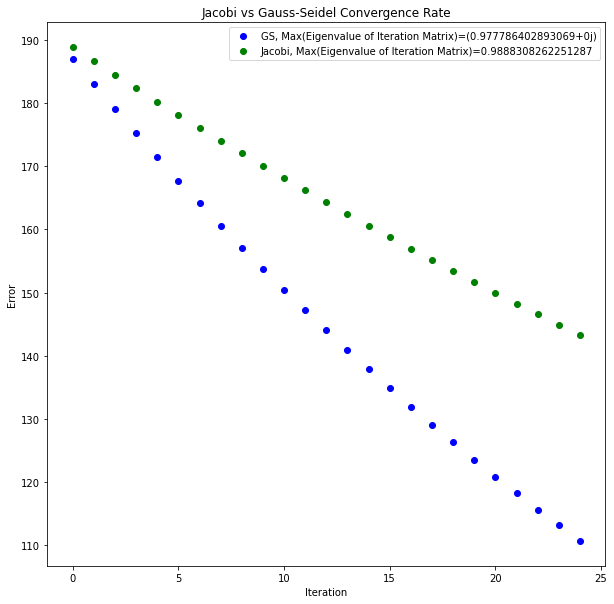

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(err_norm_gs,'bo', label = "GS, Max(Eigenvalue of Iteration Matrix)="+str(max(eigenGS)))
plt.plot(err_norm_jacobi, 'go', label= "Jacobi, Max(Eigenvalue of Iteration Matrix)="+str(max(eigenJ)))
plt.title("Jacobi vs Gauss-Seidel Convergence Rate")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.savefig("comparison.png")

In [23]:
df

,True Values,"After 25 Iteration, Jacobi Sol","After 25 Iteration, GS Sol"
x1,7.333333,1.404931,2.139201
x2,14.566667,2.809773,4.351228
x3,21.600000,4.192291,6.622857
x4,28.333333,5.574174,8.940488
x5,34.666667,6.919512,11.289084
x6,40.500000,8.261731,13.650535
x7,45.733333,9.562182,16.001418
x8,50.266667,10.850376,18.310223
x9,54.000000,12.090272,20.534211
x10,56.833333,13.290389,22.616138


In [24]:
err

,Jacobi Error,GS Error
x1,5.928402,5.194133
x2,11.756894,10.215439
x3,17.407709,14.977143
x4,22.759160,19.392845
x5,27.747155,23.377582
x6,32.238269,26.849465
x7,36.171152,29.731916
x8,39.416291,31.956444
x9,41.909728,33.465789
x10,43.542944,34.217195


In [25]:
# Reference : https://www.codesansar.com/numerical-methods/python-program-successive-over-relaxation.htm
# Successive over-relaxation (SOR)
if is_pos_def(hw5.A):
    # Initial setup
    x1= 0 
    x1= 0
    x2= 0
    x3= 0
    x4= 0
    x5= 0
    x6= 0
    x7= 0
    x8= 0
    x9= 0
    x10=0
    x11=0
    x12=0
    x13=0
    x14=0
    x15=0
    x16=0
    x17=0
    x18=0
    x19=0
    x20=0
    count = 1

    # Reading relaxation factor
    #TODO: Find optimal one
    w = 1.1

    # Implementation of successive over-relaxation

    while count <= 25:
        x1 =   (1-w) * x1 + w * f1(x1,x2)
        x2 =   (1-w) * x2 + w * f2(x1,x2,x3)
        x3 =   (1-w) * x3 + w * f3(x2,x3,x4)
        x4 =   (1-w) * x4 + w * f4(x3,x4,x5)
        x5 =   (1-w) * x5 + w * f5(x4,x5,x6)
        x6 =   (1-w) * x6 + w * f6(x5,x6,x7)
        x7 =   (1-w) * x7 + w * f7(x6,x7,x8)
        x8 =   (1-w) * x8 + w * f8(x7,x8,x9)
        x9 =   (1-w) * x9 + w * f9(x8,x9,x10)
        x10 = (1-w) * x10 + w * f10(x9,x10,x11)
        x11 = (1-w) * x11 + w * f11(x10,x11,x12)
        x12 = (1-w) * x12 + w * f12(x11,x12,x13)
        x13 = (1-w) * x13 + w * f13(x12,x13,x14)
        x14 = (1-w) * x14 + w * f14(x13,x14,x15)
        x15 = (1-w) * x15 + w * f15(x14,x15,x16)
        x16 = (1-w) * x16 + w * f16(x15,x16,x17)
        x17 = (1-w) * x17 + w * f17(x16,x17,x18)
        x18 = (1-w) * x18 + w * f18(x17,x18,x19)
        x19 = (1-w) * x19 + w * f19(x18,x19,x20)
        x20 = (1-w) * x20 + w * f20(x19,x20)
        count = count +1

The matrix is positive definite


In [26]:
x1

2.4160388056101647

In [63]:
# Richardson: Stationary and Nonpreconditions
x1_i=0
x1_i=0
x2_i=0
x3_i=0
x4_i=0
x5_i=0
x6_i=0
x7_i=0
x8_i=0
x9_i=0
x10_i=0
x11_i=0
x12_i=0
x13_i=0
x14_i=0
x15_i=0
x16_i=0
x17_i=0
x18_i=0
x19_i=0
x20_i=0
count = 1

x1= 1 
x1= 1
x2= 1
x3= 1
x4= 1
x5= 1
x6= 1
x7= 1
x8= 1
x9= 1
x10=1
x11=1
x12=1
x13=1
x14=1
x15=1
x16=1
x17=1
x18=1
x19=1
x20=1

eigenvalues, eigenvectors = np.linalg.eig(hw5.A)
alpha = 2 / (max(eigenvalues) + min(eigenvalues))
# alpha = 0.0
print("Alpha is ,",alpha)

# while count <=90000:
#     x1 =   -alpha * f1(x1,x2)
#     x2 =   -alpha * f2(x1,x2,x3)
#     x3 =   -alpha * f3(x2,x3,x4)
#     x4 =   -alpha * f4(x3,x4,x5)
#     x5 =   -alpha * f5(x4,x5,x6)
#     x6 =   -alpha * f6(x5,x6,x7)
#     x7 =   -alpha * f7(x6,x7,x8)
#     x8 =   -alpha * f8(x7,x8,x9)
#     x9 =   -alpha * f9(x8,x9,x10)
#     x10 =  -alpha * f10(x9,x10,x11)
#     x11 =  -alpha * f11(x10,x11,x12)
#     x12 =  -alpha * f12(x11,x12,x13)
#     x13 =  -alpha * f13(x12,x13,x14)
#     x14 =  -alpha * f14(x13,x14,x15)
#     x15 =  -alpha * f15(x14,x15,x16)
#     x16 =  -alpha * f16(x15,x16,x17)
#     x17 =  -alpha * f17(x16,x17,x18)
#     x18 =  -alpha * f18(x17,x18,x19)
#     x19 =  -alpha * f19(x18,x19,x20)
#     x20 =  -alpha * f20(x19,x20)
#     count+= 1
    
    
    
# while count <=900:
#     x1 =  x1  - alpha * f1(x1,x2)
#     x2 =  x2  - alpha * f2(x1,x2,x3)
#     x3 =  x3  - alpha * f3(x2,x3,x4)
#     x4 =  x4  - alpha * f4(x3,x4,x5)
#     x5 =  x5  - alpha * f5(x4,x5,x6)
#     x6 =  x6  - alpha * f6(x5,x6,x7)
#     x7 =  x7  - alpha * f7(x6,x7,x8)
#     x8 =  x8  - alpha * f8(x7,x8,x9)
#     x9 =  x9  - alpha * f9(x8,x9,x10)
#     x10 = x10 - alpha * f10(x9,x10,x11)
#     x11 = x11 - alpha * f11(x10,x11,x12)
#     x12 = x12 - alpha * f12(x11,x12,x13)
#     x13 = x13 - alpha * f13(x12,x13,x14)
#     x14 = x14 - alpha * f14(x13,x14,x15)
#     x15 = x15 - alpha * f15(x14,x15,x16)
#     x16 = x16 - alpha * f16(x15,x16,x17)
#     x17 = x17 - alpha * f17(x16,x17,x18)
#     x18 = x18 - alpha * f18(x17,x18,x19)
#     x19 = x19 - alpha * f19(x18,x19,x20)
#     x20 = x20 - alpha * f20(x19,x20)
#     count+= 1



# while count <=900000:
#     x1 =  x1_i  - alpha * f1(x1_i,x2_i)
#     x2 =  x2_i  - alpha * f2(x1_i,x2_i,x3_i)
#     x3 =  x3_i  - alpha * f3(x2_i,x3_i,x4_i)
#     x4 =  x4_i  - alpha * f4(x3_i,x4_i,x5_i)
#     x5 =  x5_i  - alpha * f5(x4_i,x5_i,x6_i)
#     x6 =  x6_i  - alpha * f6(x5_i,x6_i,x7_i)
#     x7 =  x7_i  - alpha * f7(x6_i,x7_i,x8_i)
#     x8 =  x8_i  - alpha * f8(x7_i,x8_i,x9_i)
#     x9 =  x9_i  - alpha * f9(x8_i,x9_i,x10_i)
#     x10 = x10_i - alpha * f10(x9_i,x10_i,x11_i)
#     x11 = x11_i - alpha * f11(x10_i,x11_i,x12_i)
#     x12 = x12_i - alpha * f12(x11_i,x12_i,x13_i)
#     x13 = x13_i - alpha * f13(x12_i,x13_i,x14_i)
#     x14 = x14_i - alpha * f14(x13_i,x14_i,x15_i)
#     x15 = x15_i - alpha * f15(x14_i,x15_i,x16_i)
#     x16 = x16_i - alpha * f16(x15_i,x16_i,x17_i)
#     x17 = x17_i - alpha * f17(x16_i,x17_i,x18_i)
#     x18 = x18_i - alpha * f18(x17_i,x18_i,x19_i)
#     x19 = x19_i - alpha * f19(x18_i,x19_i,x20_i)
#     x20 = x20_i - alpha * f20(x19_i,x20_i)
#     count+= 1
    
#     x1_i=  x1
#     x1_i=  x1
#     x2_i=  x2
#     x3_i=  x3
#     x4_i=  x4
#     x5_i=  x5
#     x6_i=  x6
#     x7_i=  x7
#     x8_i=  x8
#     x9_i=  x9
#     x10_i= x10 
#     x11_i= x11 
#     x12_i= x12 
#     x13_i= x13 
#     x14_i= x14 
#     x15_i= x15 
#     x16_i= x16 
#     x17_i= x17 
#     x18_i= x18 
#     x19_i= x19 
#     x20_i= x20
    
while count <=900000:
    x1 =  + alpha * f1(x1_i,x2_i)
    x2 =  + alpha * f2(x1_i,x2_i,x3_i)
    x3 =  + alpha * f3(x2_i,x3_i,x4_i)
    x4 =  + alpha * f4(x3_i,x4_i,x5_i)
    x5 =  + alpha * f5(x4_i,x5_i,x6_i)
    x6 =  + alpha * f6(x5_i,x6_i,x7_i)
    x7 =  + alpha * f7(x6_i,x7_i,x8_i)
    x8 =  + alpha * f8(x7_i,x8_i,x9_i)
    x9 =  + alpha * f9(x8_i,x9_i,x10_i)
    x10 = + alpha * f10(x9_i,x10_i,x11_i)
    x11 = + alpha * f11(x10_i,x11_i,x12_i)
    x12 = + alpha * f12(x11_i,x12_i,x13_i)
    x13 = + alpha * f13(x12_i,x13_i,x14_i)
    x14 = + alpha * f14(x13_i,x14_i,x15_i)
    x15 = + alpha * f15(x14_i,x15_i,x16_i)
    x16 = + alpha * f16(x15_i,x16_i,x17_i)
    x17 = + alpha * f17(x16_i,x17_i,x18_i)
    x18 = + alpha * f18(x17_i,x18_i,x19_i)
    x19 = + alpha * f19(x18_i,x19_i,x20_i)
    x20 = + alpha * f20(x19_i,x20_i)
    count+= 1
    
    x1_i=  x1
    x1_i=  x1
    x2_i=  x2
    x3_i=  x3
    x4_i=  x4
    x5_i=  x5
    x6_i=  x6
    x7_i=  x7
    x8_i=  x8
    x9_i=  x9
    x10_i= x10 
    x11_i= x11 
    x12_i= x12 
    x13_i= x13 
    x14_i= x14 
    x15_i= x15 
    x16_i= x16 
    x17_i= x17 
    x18_i= x18 
    x19_i= x19 
    x20_i= x20

Alpha is , 0.5


In [83]:
def richardson(A,b,N=9000,x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = np.zeros(len(A[0]))

    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    eigenvalues, eigenvectors = np.linalg.eig(A)
    alpha = 2 / (max(eigenvalues) + min(eigenvalues))

    # Iterate for N times                                                                                                                                                                          
    for i in range(N):
        x = x + alpha * R
    return x

# Solve
b = np.linspace(0.1, 2.0, 20)
# richardson(hw5.A, b)

In [95]:
D = sliding_windows_vw([0,2,0], 18)
L = sliding_windows_vw([-1,0,0], 18)
U = sliding_windows_vw([0,0,-1], 18)

In [97]:
print(D)
print(L)
print(U)

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
(20, 20)
(20, 20)
